# Baseline classifier
ReLU activation, 4 layers, 100 neurons per layer
Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *
from keras.models import load_model

Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200
preTrainMaxEpochs = 10

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelRelu', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

new_loss_functions = get_losses_dict([0.5])

name = "weights/ReLU_Baseline_CLR_AsimovLoss"
name_pretrain = name.replace('weights/', 'weights/PRETRAIN_')

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])

('\nTraining on', 31, 'features:', ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py'])


## Import data

In [4]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

## Determine LR

In [ ]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

(2, 'classes found, running in binary mode\n')


## Train classifier

<b>Cross-entropy</b> pre-training with ``preTrainMaxEpochs``

In [5]:
newModelArgs = modelParams.copy()
newModelArgs['compileArgs'] = compileArgs.copy()
newModelArgs['compileArgs']['lr'] = 2e-3
patience = 2  # is 50 above

Using cosine annealing
Training using weights
('Running fold', 1, '/', 10)
(2, 'classes found, running in binary mode\n')
1 New best found: 3.94851776352e-05
2 New best found: 3.88329699583e-05
3 New best found: 3.72938999567e-05
5 New best found: 3.61868365392e-05
6 New best found: 3.59474484498e-05
7 New best found: 3.56673438493e-05
10 New best found: 3.56491799746e-05
11 New best found: 3.51243561358e-05
12 New best found: 3.50279459337e-05
13 New best found: 3.4632761927e-05
14 New best found: 3.44834539887e-05
15 New best found: 3.44602866088e-05
22 New best found: 3.4352493329e-05
23 New best found: 3.41797649324e-05
25 New best found: 3.39636302685e-05
26 New best found: 3.3863882731e-05
27 New best found: 3.37242178425e-05
29 New best found: 3.36524927961e-05
Learning process stalled at 3.504140321447805e-05. Stopping...
Learning process stalled at 3.5077775784182455e-05. Stopping...
('Score is:', {'loss': 3.365249279608089e-05, 'AUC': 0.1104476699973751, 'cut': 0.924191296100

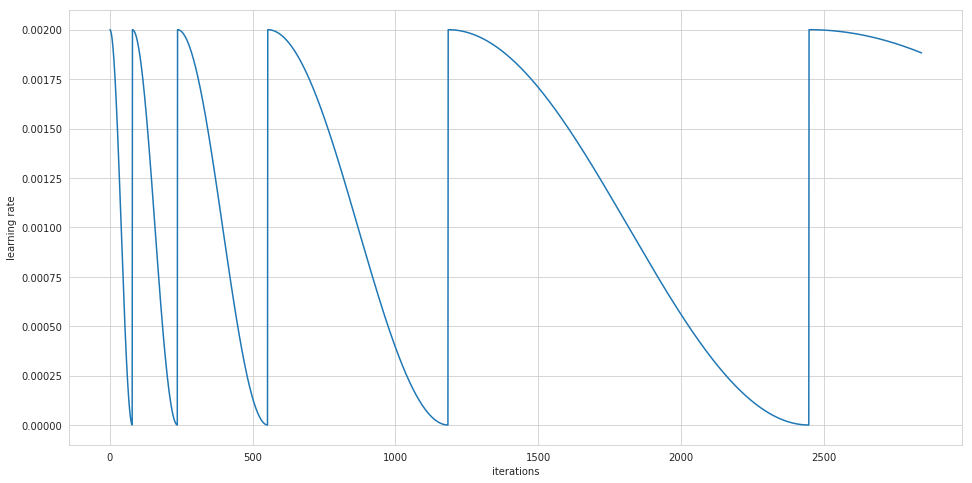

Fold took 194.001s

('Running fold', 2, '/', 10)
1 New best found: 3.31463957855e-05
3 New best found: 3.29719944436e-05
7 New best found: 3.29459162906e-05
14 New best found: 3.29298080634e-05
15 New best found: 3.29072983291e-05
Learning process stalled at 3.3699349202138536e-05. Stopping...
Learning process stalled at 3.3553627466492185e-05. Stopping...
Learning process stalled at 3.3110060372365486e-05. Stopping...
('Score is:', {'loss': 3.2907298329102946e-05, 'AUC': 0.10470433234345966, 'cut': 0.925082266330719, 'wAUC': 0.06748450253391214, 'AMS': 3.7237201885026114})


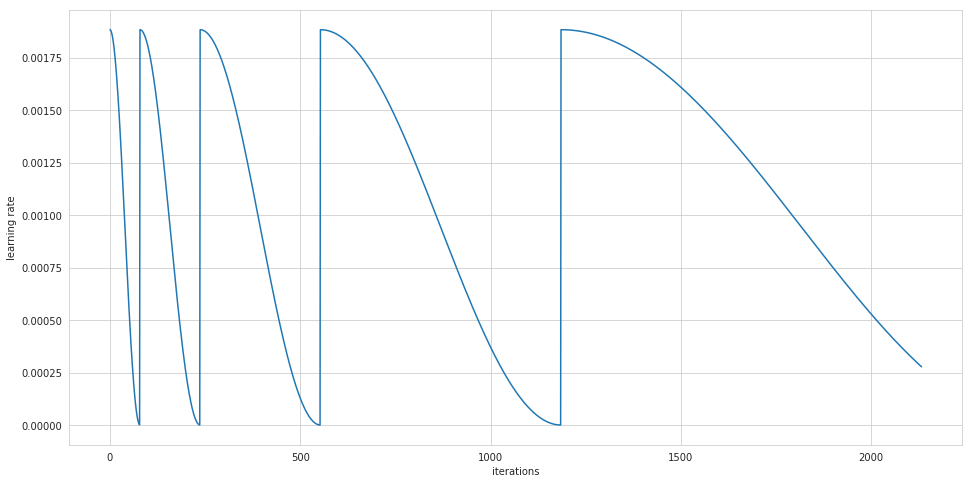

Fold took 133.728s

('Running fold', 3, '/', 10)
1 New best found: 3.13864415665e-05
3 New best found: 3.13761186041e-05
CosineAnneal stalling after 15 epochs, entering redux decay at LR=2.74112246492e-08
16 New best found: 3.13761024377e-05
17 New best found: 3.13760902962e-05
18 New best found: 3.13760776912e-05
19 New best found: 3.13760655803e-05
20 New best found: 3.13760472072e-05
21 New best found: 3.1376036559e-05
22 New best found: 3.13760242654e-05
23 New best found: 3.13760099205e-05
24 New best found: 3.13759984782e-05
25 New best found: 3.13759832795e-05
26 New best found: 3.1375965694e-05
27 New best found: 3.13759521919e-05
28 New best found: 3.13759384549e-05
29 New best found: 3.13759167336e-05
30 New best found: 3.13759089374e-05
31 New best found: 3.13758955424e-05
32 New best found: 3.13758862096e-05
33 New best found: 3.13758722026e-05
34 New best found: 3.13758631016e-05
35 New best found: 3.13758411395e-05
36 New best found: 3.13758234678e-05
37 New best found: 3

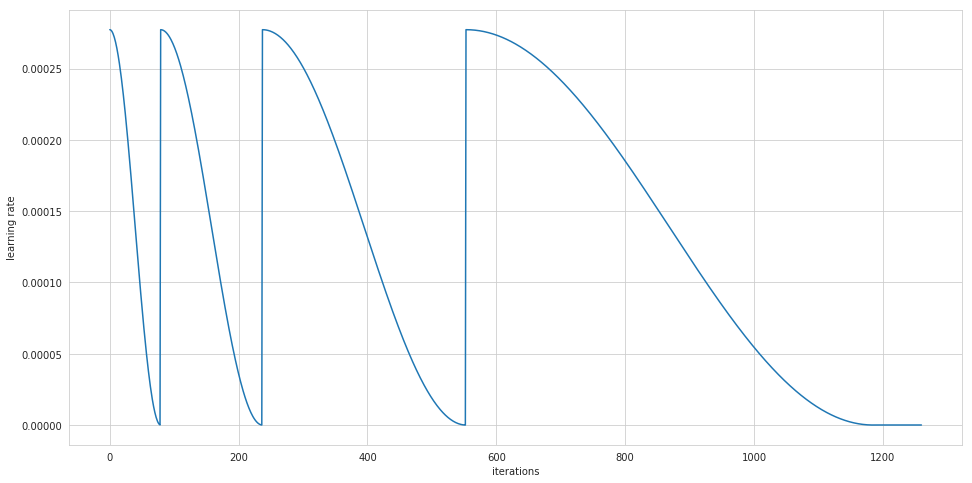

Fold took 455.452s

('Running fold', 4, '/', 10)
1 New best found: 3.14342749349e-05
2 New best found: 3.14342709229e-05
3 New best found: 3.14342694881e-05
4 New best found: 3.14342356447e-05
5 New best found: 3.14342231912e-05
6 New best found: 3.14342226935e-05
7 New best found: 3.1434222628e-05
8 New best found: 3.14342113546e-05
9 New best found: 3.14341920151e-05
10 New best found: 3.14341842066e-05
11 New best found: 3.14341813355e-05
12 New best found: 3.14341775462e-05
13 New best found: 3.14341750694e-05
14 New best found: 3.1434174678e-05
15 New best found: 3.14341746285e-05
16 New best found: 3.14341575853e-05
17 New best found: 3.14341453806e-05
18 New best found: 3.14341249905e-05
19 New best found: 3.14341127596e-05
20 New best found: 3.14341109712e-05
21 New best found: 3.14340991317e-05
22 New best found: 3.14340838187e-05
23 New best found: 3.14340769633e-05
24 New best found: 3.14340749901e-05
25 New best found: 3.14340715733e-05
26 New best found: 3.14340694647e-05


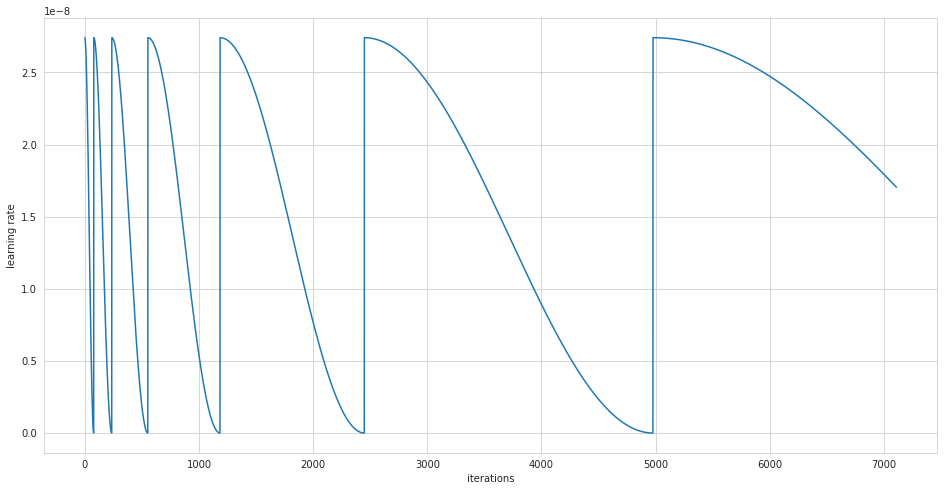

Fold took 482.336s

('Running fold', 5, '/', 10)
1 New best found: 3.10180486413e-05
2 New best found: 3.10180463275e-05
3 New best found: 3.10180454035e-05
4 New best found: 3.10180406406e-05
6 New best found: 3.10180394314e-05
7 New best found: 3.10180393441e-05
8 New best found: 3.10180343222e-05
9 New best found: 3.10180301021e-05
11 New best found: 3.1018029507e-05
12 New best found: 3.10180284418e-05
13 New best found: 3.10180280037e-05
15 New best found: 3.10180279746e-05
16 New best found: 3.10180239117e-05
17 New best found: 3.1018017896e-05
18 New best found: 3.1018013932e-05
20 New best found: 3.1018011448e-05
21 New best found: 3.10180081273e-05
22 New best found: 3.10180047367e-05
24 New best found: 3.1018003037e-05
26 New best found: 3.10180023778e-05
27 New best found: 3.10180019209e-05
32 New best found: 3.1018001026e-05
33 New best found: 3.10179928347e-05
34 New best found: 3.10179907712e-05
35 New best found: 3.10179829263e-05
36 New best found: 3.10179796899e-05
38 

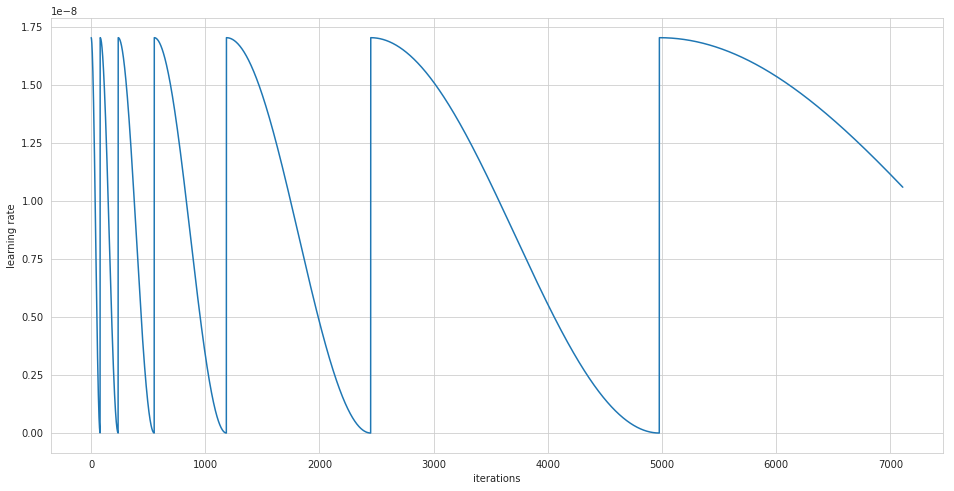

Fold took 470.737s

('Running fold', 6, '/', 10)
1 New best found: 3.1348860827e-05
4 New best found: 3.13488600208e-05
5 New best found: 3.13488573156e-05
6 New best found: 3.13488569518e-05
7 New best found: 3.13488568674e-05
8 New best found: 3.13488484055e-05
9 New best found: 3.13488464773e-05
10 New best found: 3.134884217e-05
16 New best found: 3.13488388667e-05
17 New best found: 3.13488316446e-05
18 New best found: 3.13488295578e-05
19 New best found: 3.13488238084e-05
23 New best found: 3.13488225744e-05
24 New best found: 3.13488224594e-05
25 New best found: 3.1348821611e-05
26 New best found: 3.13488210042e-05
27 New best found: 3.13488208558e-05
28 New best found: 3.13488206521e-05
32 New best found: 3.13488181404e-05
33 New best found: 3.13488178494e-05
34 New best found: 3.13488156637e-05
35 New best found: 3.13488065047e-05
36 New best found: 3.13488049942e-05
37 New best found: 3.134880016e-05
41 New best found: 3.13487996988e-05
42 New best found: 3.13487986801e-05
43

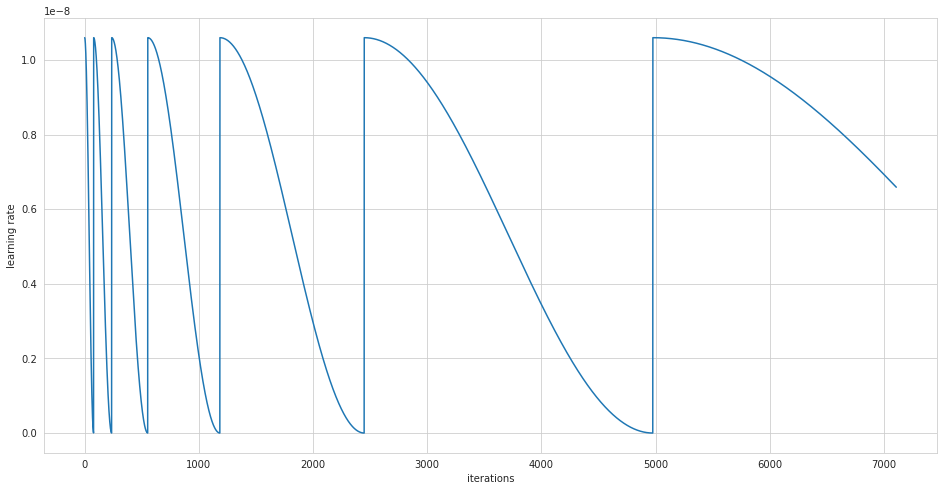

Fold took 471.726s

('Running fold', 7, '/', 10)
1 New best found: 3.10226470363e-05
2 New best found: 3.10226457237e-05
4 New best found: 3.1022645146e-05
6 New best found: 3.10226450369e-05
8 New best found: 3.10226438552e-05
10 New best found: 3.1022643813e-05
11 New best found: 3.10226432121e-05
13 New best found: 3.10226431175e-05
14 New best found: 3.10226430796e-05
15 New best found: 3.10226430651e-05
16 New best found: 3.10226423535e-05
17 New best found: 3.10226415269e-05
19 New best found: 3.10226406276e-05
20 New best found: 3.10226396279e-05
21 New best found: 3.10226390036e-05
22 New best found: 3.10226389294e-05
23 New best found: 3.10226385191e-05
25 New best found: 3.10226385089e-05
26 New best found: 3.10226384827e-05
27 New best found: 3.10226384565e-05
32 New best found: 3.10226376721e-05
33 New best found: 3.10226370071e-05
34 New best found: 3.10226357979e-05
38 New best found: 3.10226352231e-05
39 New best found: 3.10226344591e-05
40 New best found: 3.10226333662e

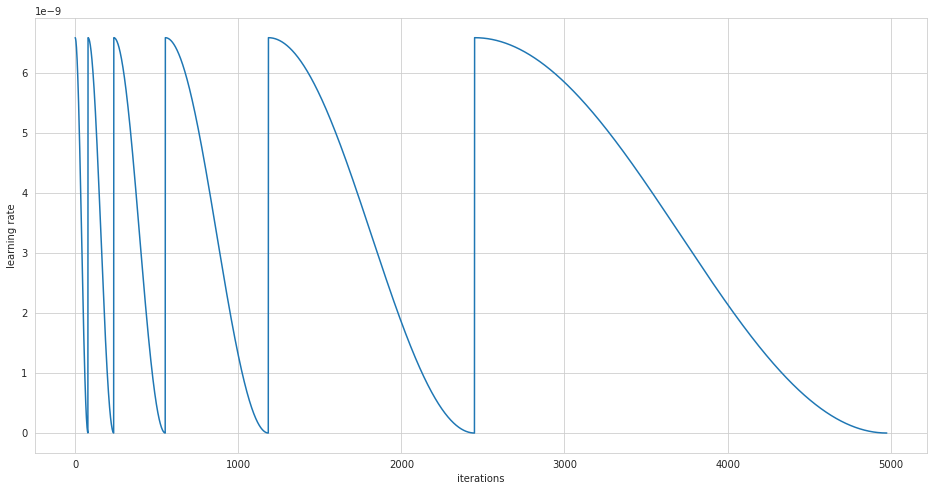

Fold took 335.535s

('Running fold', 8, '/', 10)
1 New best found: 3.03131916952e-05
CosineAnneal stalling after 7 epochs, entering redux decay at LR=1.00571885562e-18
Early stopping after 17 epochs
('Score is:', {'loss': 3.0313191695165363e-05, 'AUC': 0.09993102253838382, 'cut': 0.9322687387466431, 'wAUC': 0.05806596155840649, 'AMS': 3.6721070294362232})


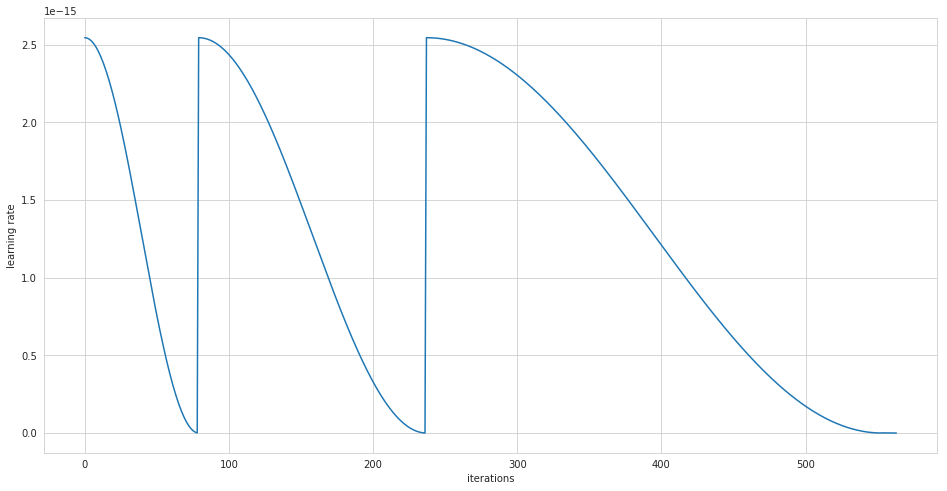

Fold took 85.461s

('Running fold', 9, '/', 10)
1 New best found: 3.14841657658e-05
CosineAnneal stalling after 7 epochs, entering redux decay at LR=4.26879015983e-23
Early stopping after 17 epochs
('Score is:', {'loss': 3.1484165765793946e-05, 'AUC': 0.1014159074125145, 'cut': 0.9675110578536987, 'wAUC': 0.061999132752965314, 'AMS': 4.123041020379626})


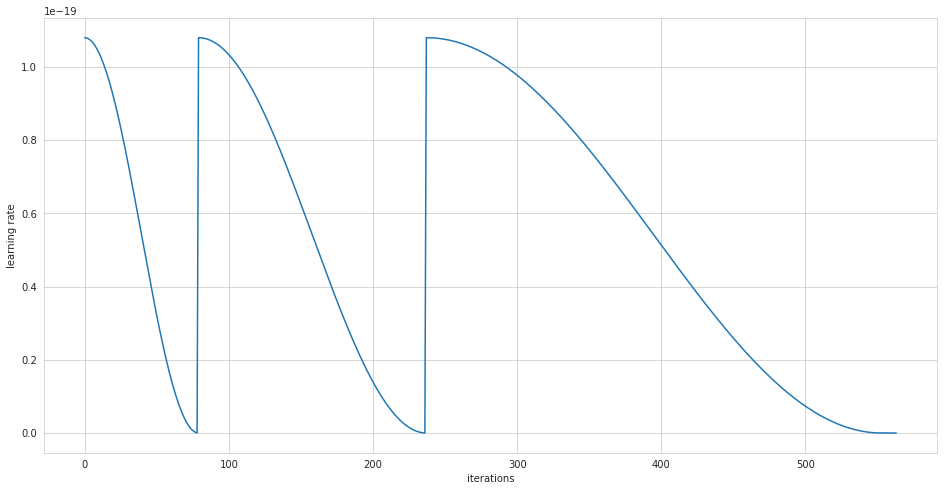

Fold took 92.731s

('Running fold', 10, '/', 10)
1 New best found: 3.15916263346e-05
CosineAnneal stalling after 7 epochs, entering redux decay at LR=1.81189476812e-27
Early stopping after 17 epochs
('Score is:', {'loss': 3.1591626334579595e-05, 'AUC': 0.1054185896002986, 'cut': 0.9354858994483948, 'wAUC': 0.06312420017540843, 'AMS': 3.6742923650698067})


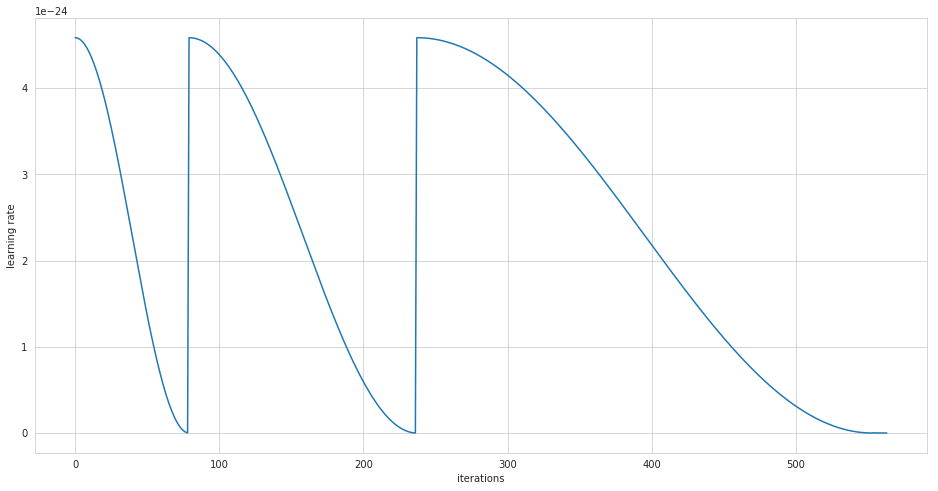

Fold took 91.736s


______________________________________
Training finished
Cross-validation took 2814.734s 


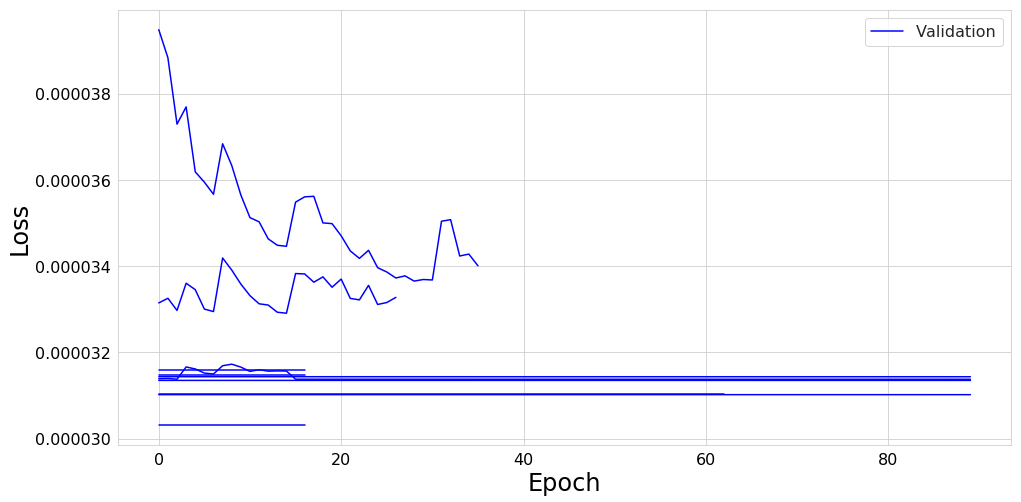

('Mean', 'loss', '= 3.16e-05 +- 3e-07')
('Mean', 'AUC', '= 0.1038 +- 0.0009')
('Mean', 'cut', '= 0.935 +- 0.006')
('Mean', 'wAUC', '= 0.063 +- 0.001')
('Mean', 'AMS', '= 3.75 +- 0.06')
______________________________________



<Figure size 432x288 with 0 Axes>

In [6]:
# need to modify the model later
model = getModel(**newModelArgs)

results, histories = batchTrainClassifier(trainData, nSplits, lambda: model, {},  # model exist already
                                          trainParams, trainOnWeights=True, maxEpochs=preTrainMaxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,  # this line added
                                          patience=patience, verbose=1, amsSize=250000)

In [7]:
model.save(name_pretrain+'_model_step1.h5')

In [6]:
model = load_model(name_pretrain+'_model_step1.h5')

<b>Significance-loss</b> pre-training with ``preTrainMaxEpochs``

Using cosine annealing
Training using weights
('Running fold', 1, '/', 10)
(2, 'classes found, running in binary mode\n')
1 New best found: 7.78829814969e-06
CosineAnneal stalling after 7 epochs, entering redux decay at LR=7.9060281025e-07
Early stopping after 17 epochs
('Score is:', {'loss': 7.788298149688392e-06, 'AUC': 0.10923079326962903, 'cut': 0.8085923790931702, 'wAUC': 0.07460876171132891, 'AMS': 3.3169650408315765})


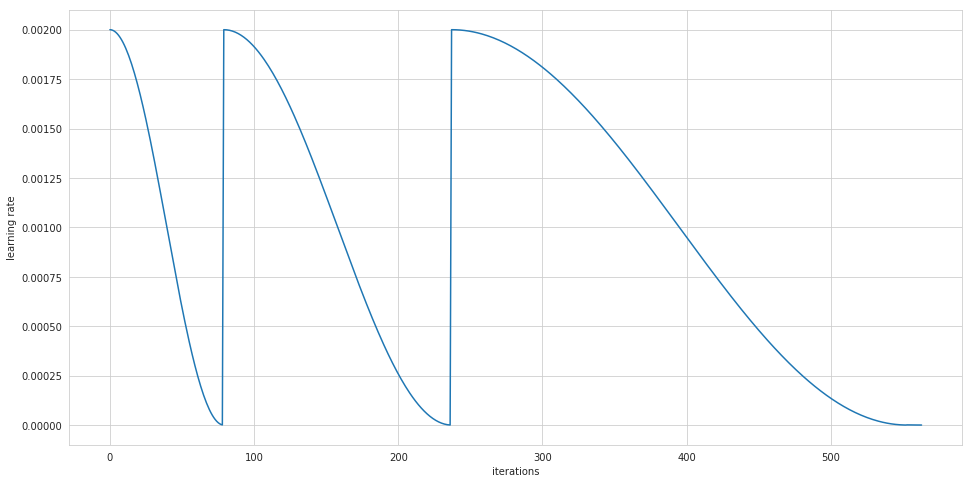

Fold took 24.672s

('Running fold', 2, '/', 10)
1 New best found: 1.76803564025e-05
2 New best found: 1.76741793888e-05
3 New best found: 1.7673037628e-05
4 New best found: 1.76679133586e-05
5 New best found: 1.76618708536e-05
6 New best found: 1.76599231055e-05
7 New best found: 1.76598667294e-05
8 New best found: 1.76543447023e-05
9 New best found: 1.76500733541e-05
10 New best found: 1.76474470347e-05
11 New best found: 1.76439307875e-05
12 New best found: 1.7643734235e-05
13 New best found: 1.76423758145e-05
14 New best found: 1.7642199028e-05
15 New best found: 1.76421560078e-05
16 New best found: 1.76370392679e-05
17 New best found: 1.76303890655e-05
18 New best found: 1.7624207184e-05
19 New best found: 1.76201187946e-05
20 New best found: 1.76148338456e-05
21 New best found: 1.76109032169e-05
22 New best found: 1.76089612339e-05
23 New best found: 1.76074050192e-05
24 New best found: 1.76058544137e-05
25 New best found: 1.76050322145e-05
26 New best found: 1.76043831559e-05
27 

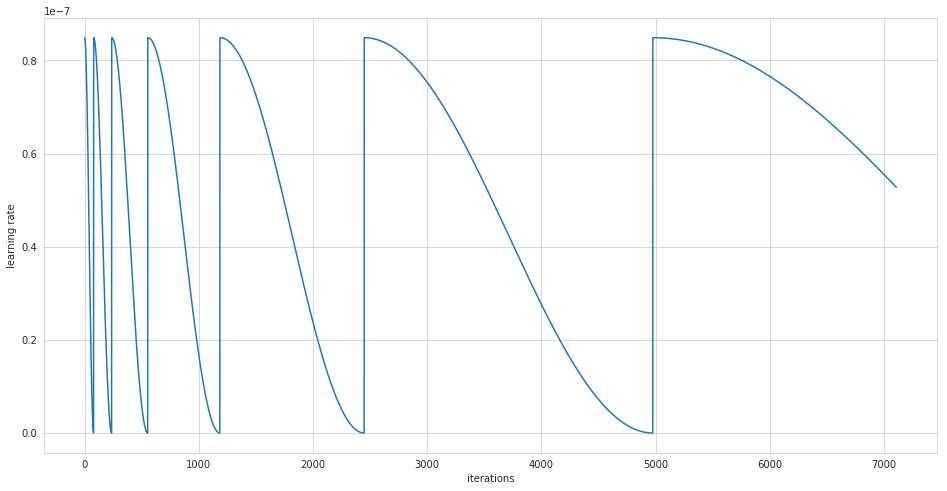

Fold took 122.912s

('Running fold', 3, '/', 10)
1 New best found: 0.00630843731111
2 New best found: 0.00630809127804
3 New best found: 0.00630801269148
4 New best found: 0.006307528189
5 New best found: 0.00630724853709
6 New best found: 0.00630716193649
7 New best found: 0.00630713981066
8 New best found: 0.00630645006318
9 New best found: 0.00630573744071
10 New best found: 0.00630521629831
11 New best found: 0.00630474019558
12 New best found: 0.00630468370527
13 New best found: 0.00630455705411
14 New best found: 0.00630455285695
15 New best found: 0.00630455133133
16 New best found: 0.00630372578496
17 New best found: 0.00630282816048
18 New best found: 0.00630215630843
20 New best found: 0.00630207177043
21 New best found: 0.00630185353203
22 New best found: 0.00630157503159
23 New best found: 0.00630141366308
24 New best found: 0.00630131522989
25 New best found: 0.00630122633461
26 New best found: 0.00630118817835
27 New best found: 0.0063011275175
32 New best found: 0.006300

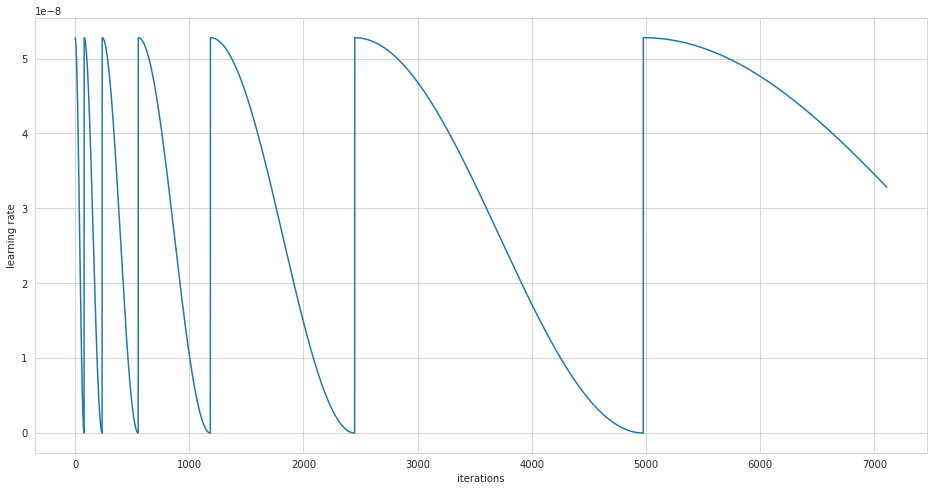

Fold took 123.075s

('Running fold', 4, '/', 10)
1 New best found: 6.99805483049e-06
5 New best found: 6.99803115194e-06
6 New best found: 6.99802411608e-06
7 New best found: 6.99802295178e-06
16 New best found: 6.99799470717e-06
22 New best found: 6.9979674753e-06
Learning process stalled at 6.998045283438615e-06. Stopping...
Learning process stalled at 6.9980724746528725e-06. Stopping...
('Score is:', {'loss': 6.997967475302858e-06, 'AUC': 0.10925926489463578, 'cut': 0.9443305134773254, 'wAUC': 0.06991205404266032, 'AMS': 3.339221733449353})


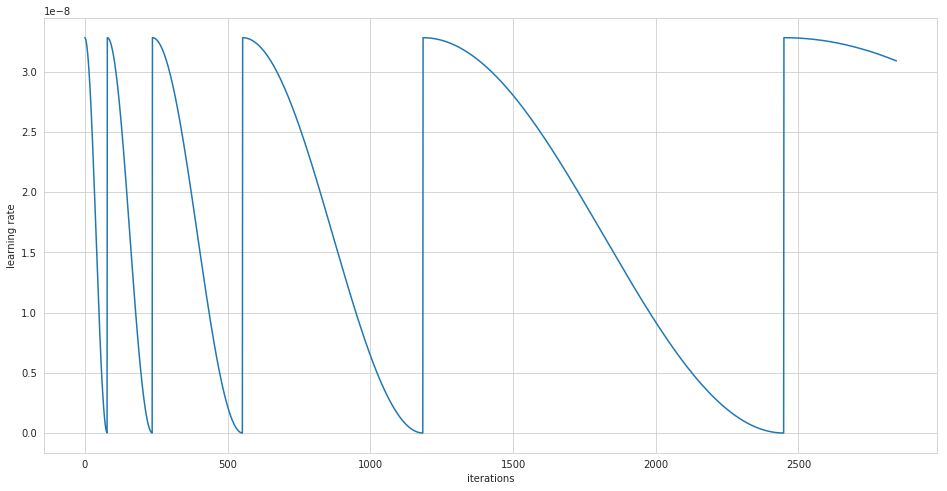

Fold took 49.692s

('Running fold', 5, '/', 10)
1 New best found: 7.13323160576e-06
5 New best found: 7.13322819943e-06
8 New best found: 7.13321548253e-06
9 New best found: 7.13319072584e-06
10 New best found: 7.1331699972e-06
11 New best found: 7.13315433666e-06
12 New best found: 7.13314985278e-06
13 New best found: 7.13314581408e-06
15 New best found: 7.13314570444e-06
16 New best found: 7.13312124653e-06
Learning process stalled at 7.1331472978272356e-06. Stopping...
32 New best found: 7.13310502526e-06
33 New best found: 7.1330749329e-06
34 New best found: 7.13299982569e-06
35 New best found: 7.13297662971e-06
36 New best found: 7.13294594109e-06
('Score is:', {'loss': 7.132945941089019e-06, 'AUC': 0.10559810618573617, 'cut': 0.9279130697250366, 'wAUC': 0.06923173539070271, 'AMS': 3.639095022133542})


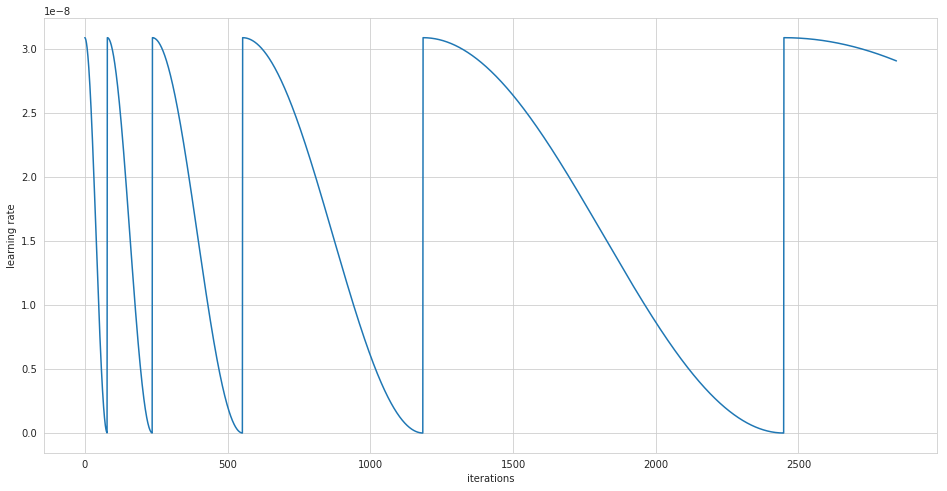

Fold took 49.570s

('Running fold', 6, '/', 10)
1 New best found: 6.63026075672e-06
2 New best found: 6.63022651236e-06
3 New best found: 6.63022399326e-06
4 New best found: 6.63019269252e-06
5 New best found: 6.6301729767e-06
6 New best found: 6.6301572257e-06
7 New best found: 6.63015634995e-06
8 New best found: 6.63010702498e-06
9 New best found: 6.63006873313e-06
10 New best found: 6.63004959517e-06
11 New best found: 6.63003540635e-06
12 New best found: 6.63002751928e-06
13 New best found: 6.63002596763e-06
14 New best found: 6.63002547359e-06
16 New best found: 6.62998273488e-06
17 New best found: 6.62994085677e-06
18 New best found: 6.62990001685e-06
19 New best found: 6.62986412489e-06
20 New best found: 6.62983130001e-06
21 New best found: 6.62980551573e-06
22 New best found: 6.62978890946e-06
23 New best found: 6.62977654391e-06
24 New best found: 6.62976357754e-06
25 New best found: 6.62975496007e-06
26 New best found: 6.62974360695e-06
27 New best found: 6.62974051793e-06
2

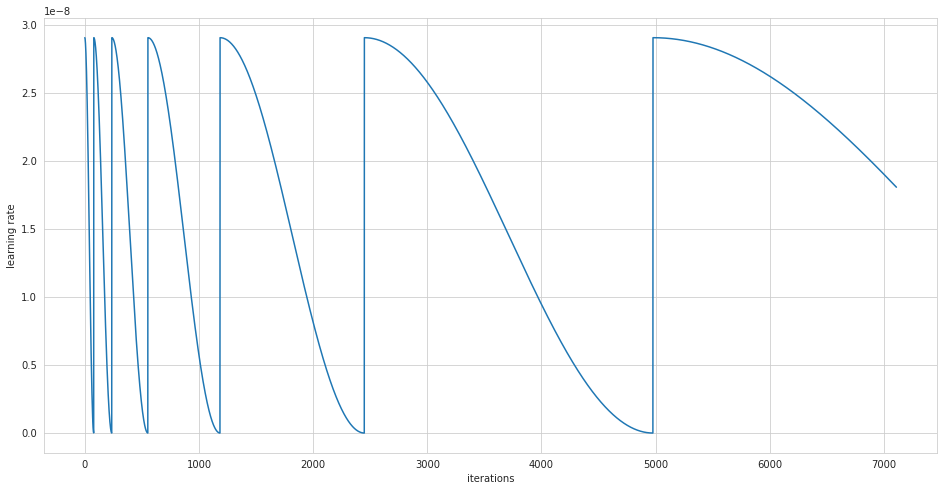

Fold took 121.663s

('Running fold', 7, '/', 10)
1 New best found: 1.49246099656e-05
CosineAnneal stalling after 7 epochs, entering redux decay at LR=7.14716271015e-12
Early stopping after 17 epochs
('Score is:', {'loss': 1.4924609965646595e-05, 'AUC': 0.1050998757614201, 'cut': 0.914867639541626, 'wAUC': 0.06722772510617137, 'AMS': 3.2995422881145275})


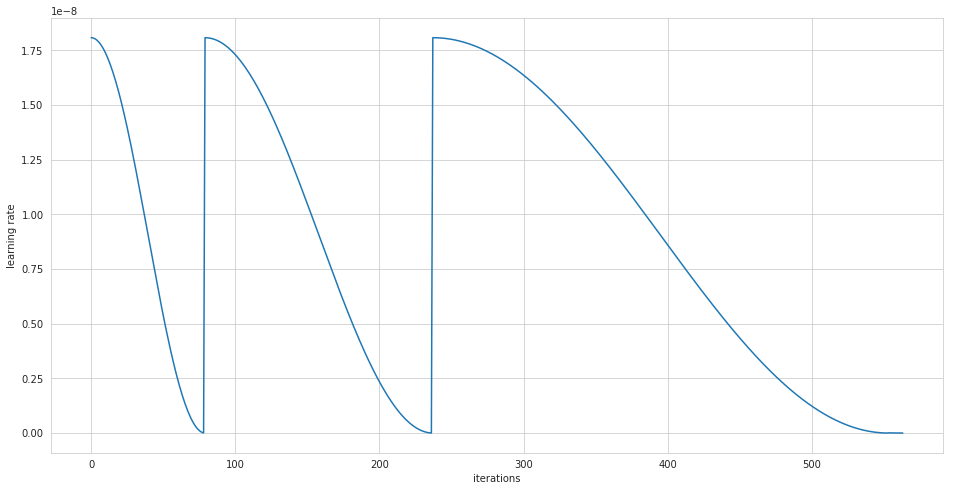

Fold took 23.417s

('Running fold', 8, '/', 10)
1 New best found: 1.14432466735e-05
CosineAnneal stalling after 7 epochs, entering redux decay at LR=3.03362461271e-16
Early stopping after 17 epochs
('Score is:', {'loss': 1.144324667351507e-05, 'AUC': 0.10318295362517016, 'cut': 0.9026623964309692, 'wAUC': 0.06584268310401986, 'AMS': 3.421326824917097})


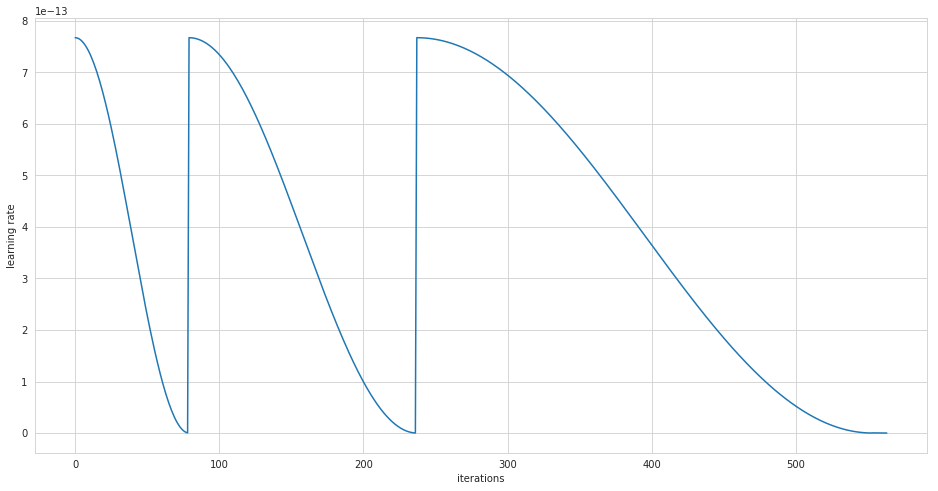

Fold took 23.319s

('Running fold', 9, '/', 10)
1 New best found: 7.02519357628e-06
CosineAnneal stalling after 7 epochs, entering redux decay at LR=1.28762708441e-20
Early stopping after 17 epochs
('Score is:', {'loss': 7.025193576283732e-06, 'AUC': 0.10586325307652722, 'cut': 0.8916996121406555, 'wAUC': 0.0710891328996005, 'AMS': 3.53880078086916})


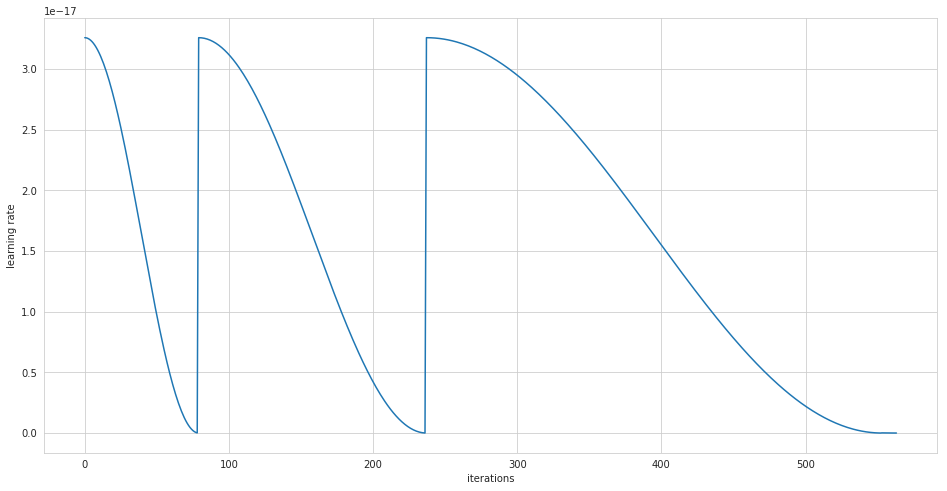

Fold took 23.852s

('Running fold', 10, '/', 10)
1 New best found: 0.000833411844931
CosineAnneal stalling after 7 epochs, entering redux decay at LR=5.46535426866e-25
Early stopping after 17 epochs
('Score is:', {'loss': 0.0008334118449309235, 'AUC': 0.11054008670424031, 'cut': 0.906647264957428, 'wAUC': 0.07237119141258308, 'AMS': 3.1929675143080476})


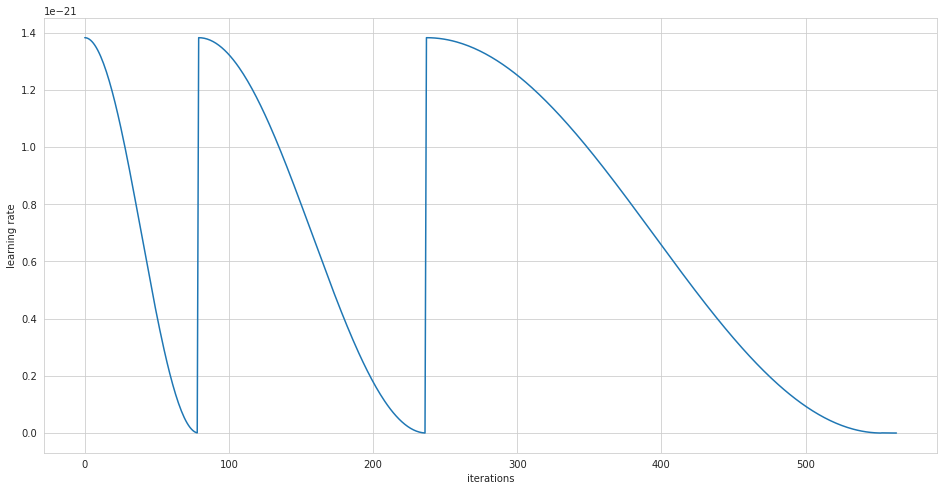

Fold took 24.082s


______________________________________
Training finished
Cross-validation took 587.830s 


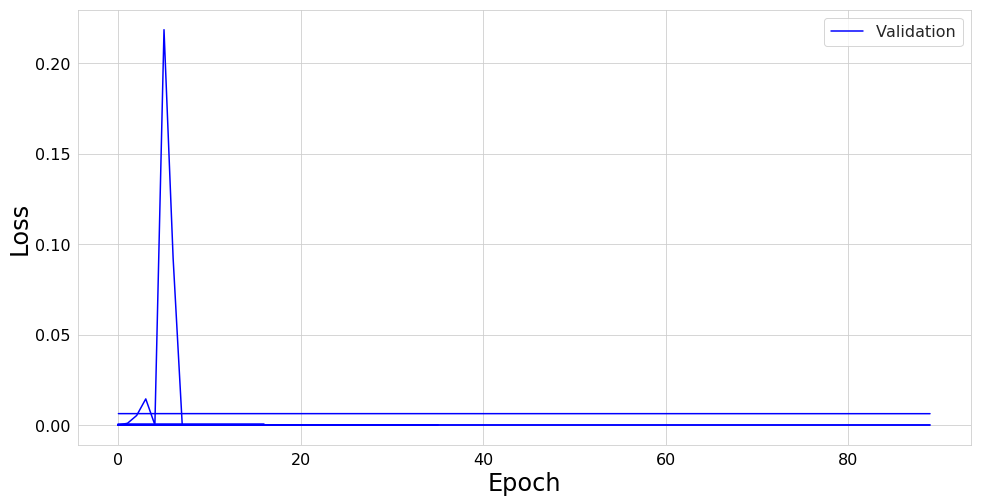

('Mean', 'loss', '= 0.0007 +- 0.0006')
('Mean', 'AUC', '= 0.1069 +- 0.0007')
('Mean', 'cut', '= 0.89 +- 0.01')
('Mean', 'wAUC', '= 0.0703 +- 0.0009')
('Mean', 'AMS', '= 3.43 +- 0.05')
______________________________________



<Figure size 432x288 with 0 Axes>

In [7]:
# recompile with new loss
model.compile(
    loss=new_loss_functions['significanceLoss2Invert'],
    optimizer=getOptimizer(newModelArgs['compileArgs'])
)

results, histories = batchTrainClassifier(trainData, nSplits, lambda: model, {},  # model exist already
                                          trainParams, trainOnWeights=True, maxEpochs=preTrainMaxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,  # this line added
                                          patience=patience, verbose=1, amsSize=250000)

In [8]:
model.save(name_pretrain+'_model_step2.h5')

In [6]:
model = load_model(name_pretrain+'_model_step2.h5', custom_objects=new_loss_functions)

<b>Asimov-significance-loss</b> training with ``maxEpochs``

Using cosine annealing
Training using weights
('Running fold', 1, '/', 10)
(2, 'classes found, running in binary mode\n')


/nfs/dust/cms/user/tholenhe/installs/anaconda2/envs/hepML3/lib/python2.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139624). Check your callbacks.
  % delta_t_median)


1 New best found: 2.13406251877e+15
CosineAnneal stalling after 7 epochs, entering redux decay at LR=7.90602752726e-08
Early stopping after 17 epochs
('Score is:', {'loss': 2134062518768670.8, 'AUC': 0.14135317162993155, 'cut': 0.01823146641254425, 'wAUC': 0.08947605134927472, 'AMS': 2.6874944810726125})


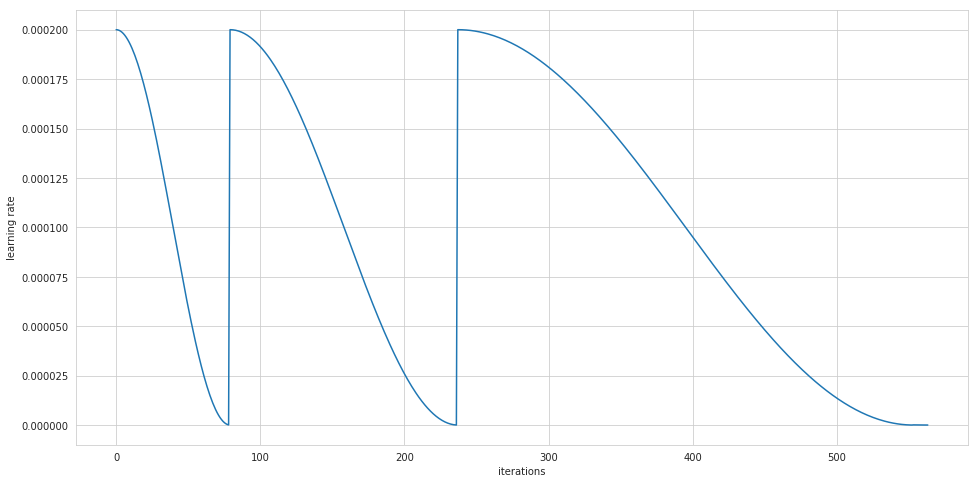

Fold took 34.081s

('Running fold', 2, '/', 10)
1 New best found: 67269.2575092
CosineAnneal stalling after 7 epochs, entering redux decay at LR=3.35572635079e-12
Early stopping after 17 epochs
('Score is:', {'loss': 67269.25750923733, 'AUC': 0.13964639805910073, 'cut': 0.017000434920191765, 'wAUC': 0.09200555042395953, 'AMS': 2.678569362065766})


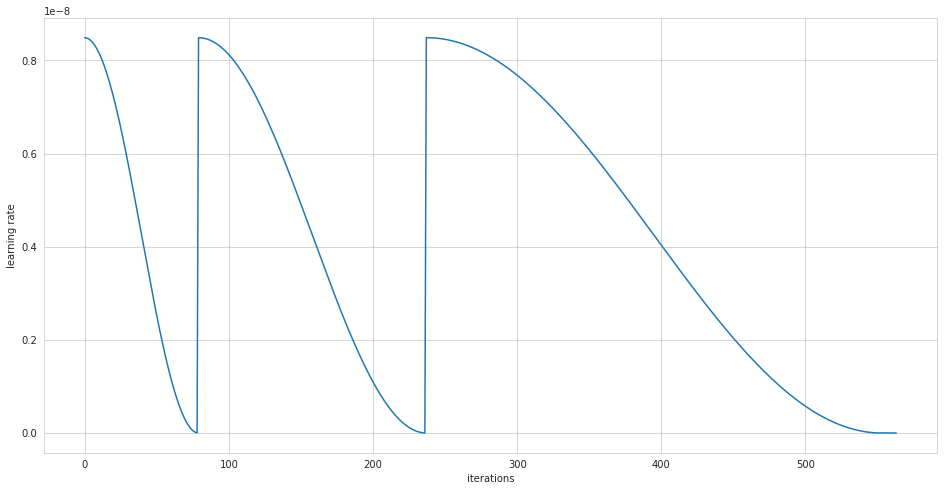

Fold took 30.545s

('Running fold', 3, '/', 10)
1 New best found: 2.22105052952
CosineAnneal stalling after 7 epochs, entering redux decay at LR=1.42434356407e-16
Early stopping after 17 epochs
('Score is:', {'loss': 2.2210505295178016, 'AUC': 0.13731591901376117, 'cut': 0.0334746278822422, 'wAUC': 0.08477672752201548, 'AMS': 2.766389007648751})


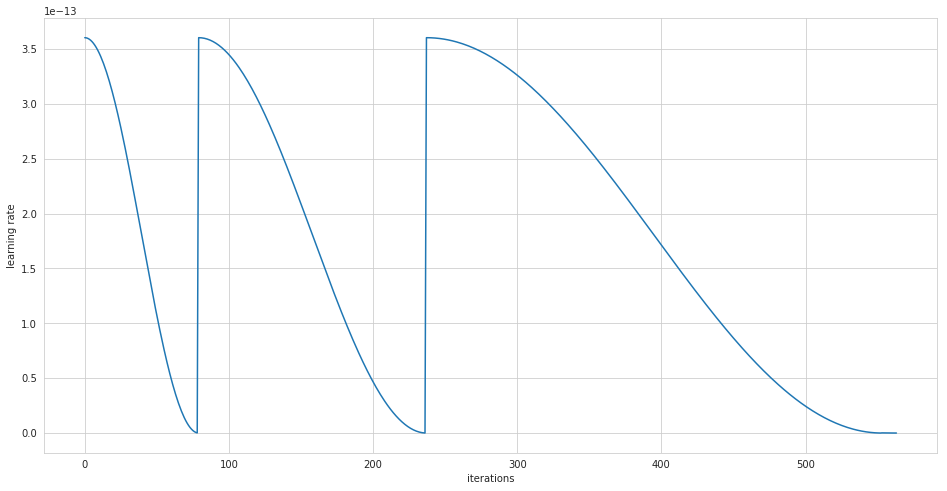

Fold took 31.802s

('Running fold', 4, '/', 10)
1 New best found: 0.000504055883598
CosineAnneal stalling after 7 epochs, entering redux decay at LR=6.04564932312e-21
Early stopping after 17 epochs
('Score is:', {'loss': 0.0005040558835984484, 'AUC': 0.14089068568714347, 'cut': 0.01137291919440031, 'wAUC': 0.08537194210748744, 'AMS': 2.6159827046691944})


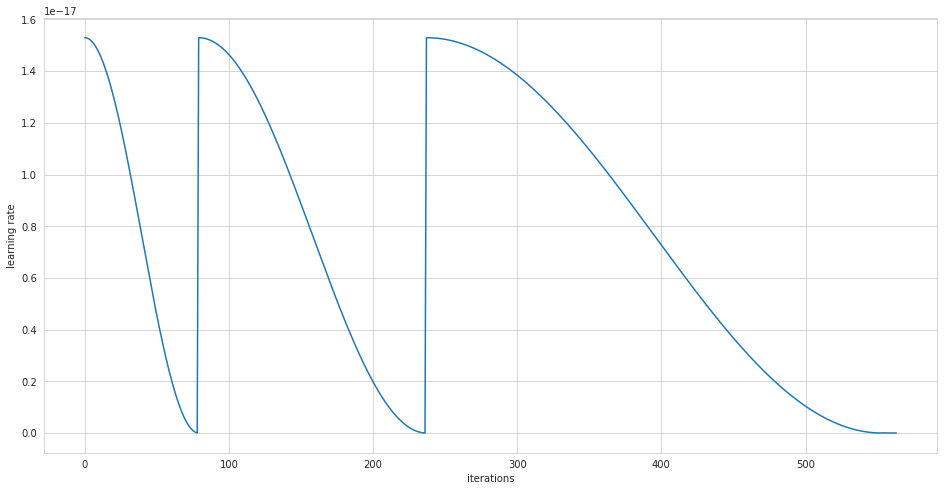

Fold took 31.834s

('Running fold', 5, '/', 10)
1 New best found: 0.000492576647884
CosineAnneal stalling after 7 epochs, entering redux decay at LR=2.56608569283e-25
Early stopping after 17 epochs
('Score is:', {'loss': 0.000492576647883834, 'AUC': 0.13815826211879245, 'cut': 0.04298219829797745, 'wAUC': 0.08616428052179514, 'AMS': 2.800520406526251})


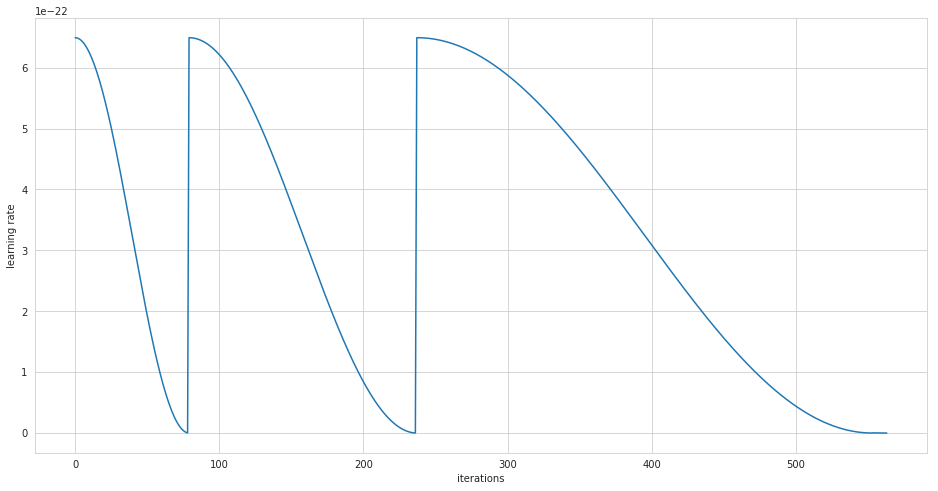

Fold took 31.427s

('Running fold', 6, '/', 10)
1 New best found: 0.000628023711265
CosineAnneal stalling after 7 epochs, entering redux decay at LR=1.08917918316e-29
Early stopping after 17 epochs
('Score is:', {'loss': 0.0006280237112649047, 'AUC': 0.1363247146279889, 'cut': 0.04871876537799835, 'wAUC': 0.08320873674321405, 'AMS': 2.8225503489029284})


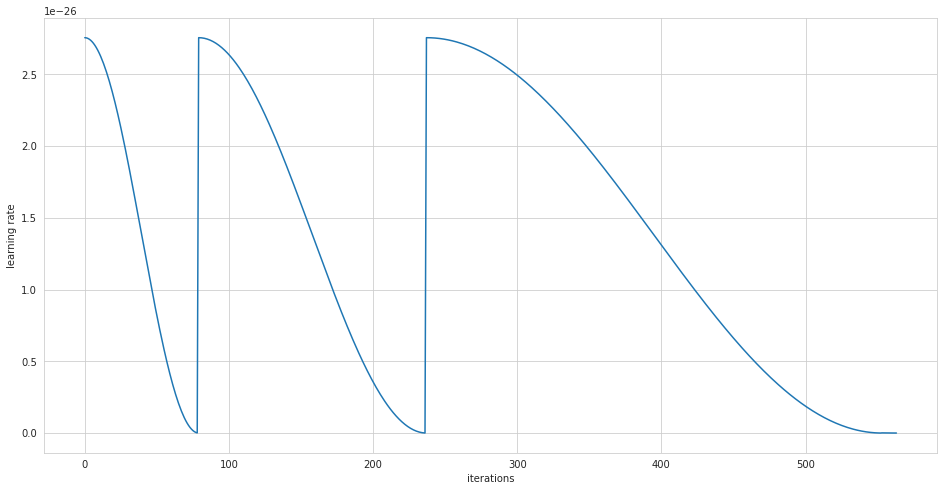

Fold took 31.183s

('Running fold', 7, '/', 10)
1 New best found: 0.0233849113109
CosineAnneal stalling after 7 epochs, entering redux decay at LR=4.62303888511e-34
Early stopping after 17 epochs
('Score is:', {'loss': 0.023384911310942696, 'AUC': 0.13566513864378693, 'cut': 0.019214889034628868, 'wAUC': 0.08212130075709134, 'AMS': 2.6490081103666747})


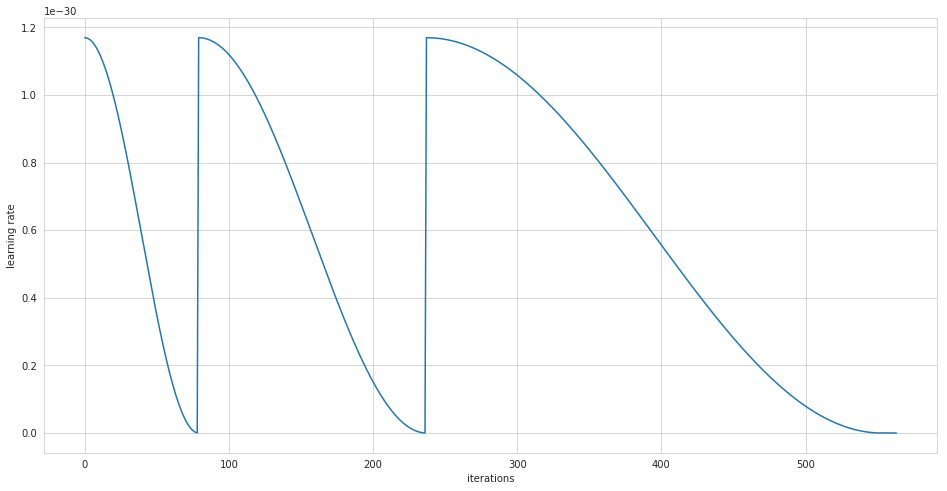

Fold took 31.394s

('Running fold', 8, '/', 10)
1 New best found: 0.0149184241803
CosineAnneal stalling after 7 epochs, entering redux decay at LR=1.96225639958e-38
Early stopping after 17 epochs
('Score is:', {'loss': 0.014918424180256592, 'AUC': 0.13540768458996544, 'cut': 0.03450027108192444, 'wAUC': 0.08320803097143403, 'AMS': 2.7765939044928096})


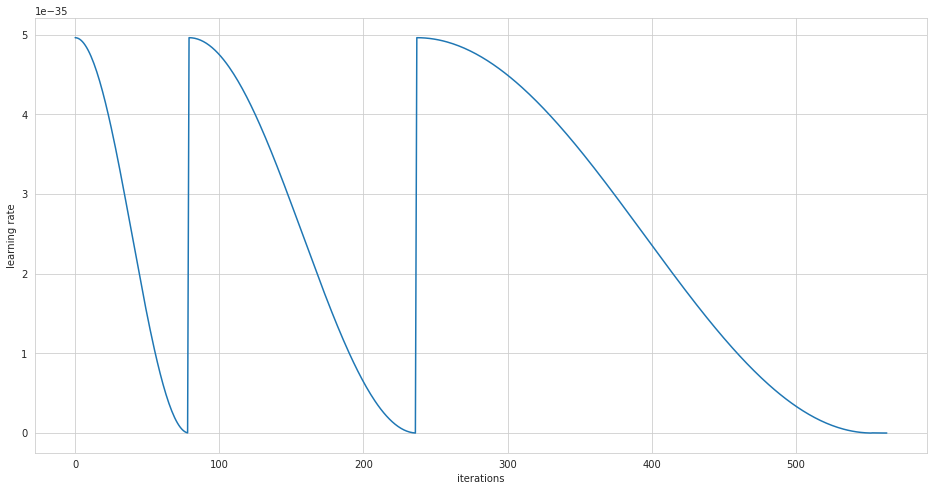

Fold took 31.434s

('Running fold', 9, '/', 10)
1 New best found: 0.000280584027421
CosineAnneal stalling after 7 epochs, entering redux decay at LR=8.32883156886e-43
Early stopping after 17 epochs
('Score is:', {'loss': 0.00028058402742102396, 'AUC': 0.13772061446613026, 'cut': 0.025103474035859108, 'wAUC': 0.0881607032198457, 'AMS': 2.8226072702461997})


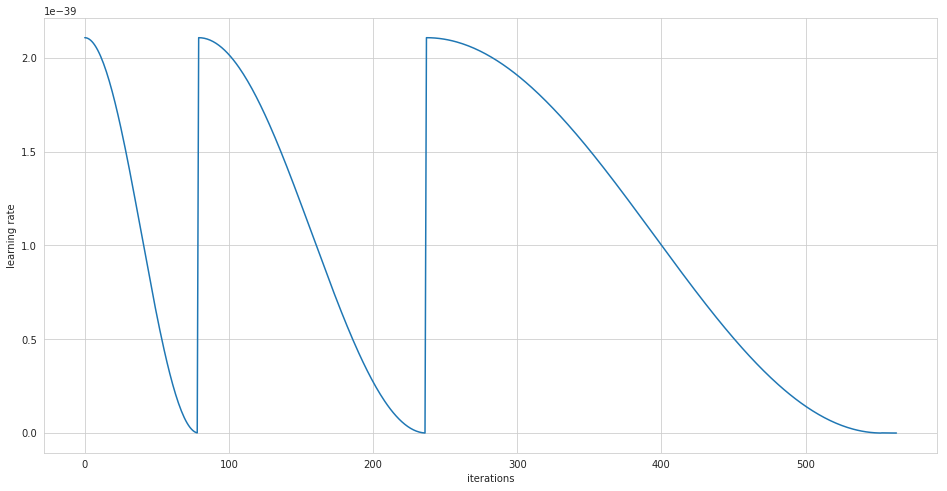

Fold took 31.453s

('Running fold', 10, '/', 10)
1 New best found: -4.67877755707
2 New best found: -4.67877755707
3 New best found: -4.67877755707
4 New best found: -4.67877755707
5 New best found: -4.67877755707
6 New best found: -4.67877755707
7 New best found: -4.67877755707
8 New best found: -4.67877755707
9 New best found: -4.67877755707
10 New best found: -4.67877755707
11 New best found: -4.67877755707
12 New best found: -4.67877755707
13 New best found: -4.67877755707
14 New best found: -4.67877755707
15 New best found: -4.67877755707
16 New best found: -4.67877755707
17 New best found: -4.67877755707
18 New best found: -4.67877755707
19 New best found: -4.67877755707
20 New best found: -4.67877755707
Learning process stalled at -4.6787775570668. Stopping...
21 New best found: -4.67877755707
Learning process stalled at -4.6787775570668. Stopping...
22 New best found: -4.67877755707
Learning process stalled at -4.6787775570668. Stopping...
23 New best found: -4.67877755707
Lear

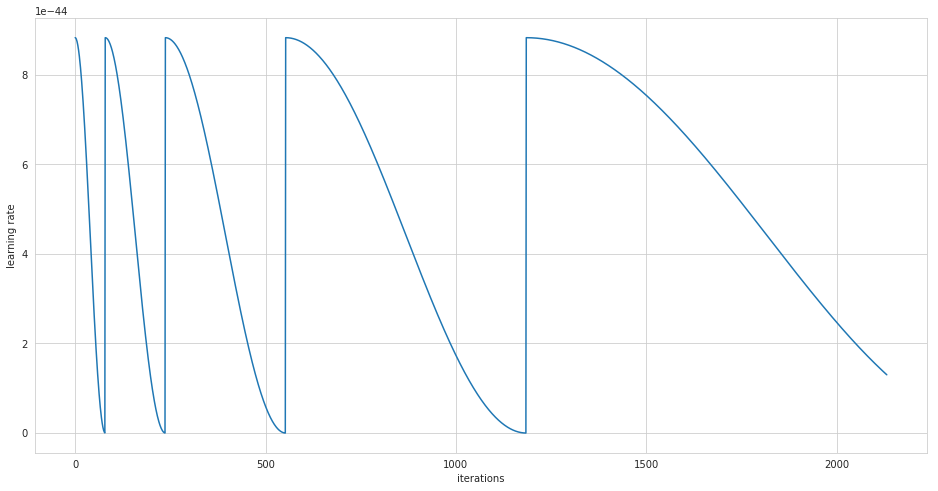

Fold took 48.451s


______________________________________
Training finished
Cross-validation took 335.036s 


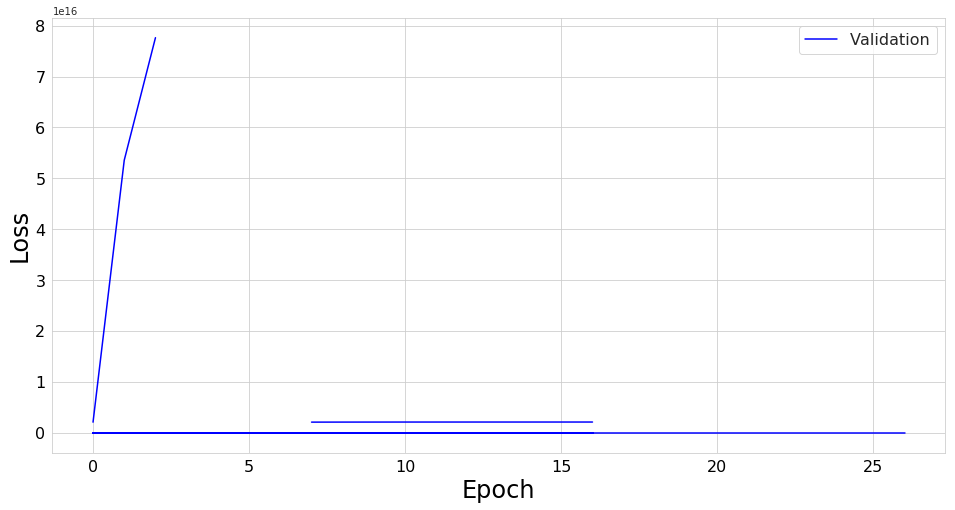

('Mean', 'loss', '= 213406251883594 +- 202454946854436')
('Mean', 'AUC', '= 0.1386 +- 0.0008')
('Mean', 'cut', '= 0.026 +- 0.004')
('Mean', 'wAUC', '= 0.086 +- 0.001')
('Mean', 'AMS', '= 2.72 +- 0.03')
______________________________________



<Figure size 432x288 with 0 Axes>

In [12]:
# syst_factr=0.5
# s_tot=None
# b_tot=None
# weights=1
# 
# def _get_s_b(s_tot, b_tot, y_true, y_pred, weights):
#     s_weights = y_true * weights
#     b_weights = (1-y_true) * weights
# 
#     s_tot_weight = s_tot/K.sum(s_weights) if s_tot else 1.
#     b_tot_weight = b_tot/K.sum(b_weights) if b_tot else 1.
# 
#     s = s_tot_weight * K.sum(y_pred * s_weights)
#     b = b_tot_weight * K.sum(y_pred * b_weights)
#     return s, b
# 
# def asimovSigLossInvert(y_true, y_pred):
#     s, b = _get_s_b(s_tot, b_tot, y_true, y_pred, weights)
#     eps = K.epsilon()  # Add the epsilon to avoid dividing by 0
#     b2 = b*b
#     syst = syst_factr * b
#     syst2 = syst*syst + eps  # eps was needed almost always where syst2 was
#     spb = s+b
#     bpsyst2 = b+syst2
# 
#     return 0.5/(
#         spb*K.log(spb*bpsyst2/(b2+spb*syst2)+eps)
#         -b2*K.log(1+syst2*s/(b*bpsyst2))/syst2
#     )
#
# asimovSigLossInvert.__name__ = 'asimovSignificanceLossInvert_Sys0p5'
# new_loss_functions['asimovSignificanceLossInvert_Sys0p5'] = asimovSigLossInvert

# recompile with new loss
newModelArgs['compileArgs']['lr'] = 2e-4

model.compile(
    loss=new_loss_functions['asimovSignificanceLossInvert_Sys0p5'],
    optimizer=getOptimizer(newModelArgs['compileArgs'])
)

results, histories = batchTrainClassifier(trainData, nSplits, lambda: model, {},  # model exist already
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,  # this line added
                                          patience=patience, verbose=1, amsSize=250000)

In [8]:
model.save(name_pretrain+'_model_step3.h5')

In [11]:
model = load_model(name_pretrain+'_model_step3.h5', custom_objects=new_loss_functions)

## Construct ensemble

In [13]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:
    results = pickle.load(fin)

In [14]:
ensemble, weights = assembleEnsemble(
    results, ensembleSize, ensembleMode, compileArgs, custom_objects=new_loss_functions)

('Choosing ensemble by', 'loss')
('Model', 0, 'is', 9, 'with', 'loss', '=', -4.6787775570668)
('Model', 1, 'is', 8, 'with', 'loss', '=', 0.00028058402742102396)
('Model', 2, 'is', 4, 'with', 'loss', '=', 0.000492576647883834)
('Model', 3, 'is', 3, 'with', 'loss', '=', 0.0005040558835984484)
('Model', 4, 'is', 5, 'with', 'loss', '=', 0.0006280237112649047)
('Model', 5, 'is', 7, 'with', 'loss', '=', 0.014918424180256592)
('Model', 6, 'is', 6, 'with', 'loss', '=', 0.023384911310942696)
('Model', 7, 'is', 2, 'with', 'loss', '=', 2.2210505295178016)
('Model', 8, 'is', 1, 'with', 'loss', '=', 67269.25750923733)
('Model', 9, 'is', 0, 'with', 'loss', '=', 2134062518768670.8)


## Response on validation datawith no ensembling

In [14]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [15]:
%%time
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=1, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000176253604889s per sample

Predicting batch 2 out of 10
Prediction took 3.78597736359e-05s per sample

Predicting batch 3 out of 10
Prediction took 3.87452125549e-05s per sample

Predicting batch 4 out of 10
Prediction took 4.62230205536e-05s per sample

Predicting batch 5 out of 10
Prediction took 3.83873939514e-05s per sample

Predicting batch 6 out of 10
Prediction took 3.81118297577e-05s per sample

Predicting batch 7 out of 10
Prediction took 4.56254005432e-05s per sample

Predicting batch 8 out of 10
Prediction took 3.7774181366e-05s per sample

Predicting batch 9 out of 10
Prediction took 3.79705905914e-05s per sample

Predicting batch 10 out of 10
Prediction took 3.76425743103e-05s per sample

CPU times: user 11.1 s, sys: 34.6 s, total: 45.7 s
Wall time: 2.68 s


In [9]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.87060068849, weighted 0.906056644079


In [11]:
%%time
amsScanSlow(convertToDF(valData.source))

(50000, 'candidates loaded')
CPU times: user 19.2 s, sys: 0 ns, total: 19.2 s
Wall time: 41.5 s


(3.574477842890102, 0.9527582)

In [12]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

(50000, 'candidates loaded')

Mean AMS=3.6+-0.1, at mean cut of 0.95+-0.01
Exact mean cut 0.947619539453, corresponds to AMS of 3.52228979407
CPU times: user 2.71 s, sys: 10 s, total: 12.7 s
Wall time: 57.8 s


(3.6, 0.95)

# Test scoring with no ensembling

In [13]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [14]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=1, verbose=1)

Predicting batch 1 out of 10
Prediction took 3.29966154965e-05s per sample

Predicting batch 2 out of 10
Prediction took 3.135192611e-05s per sample

Predicting batch 3 out of 10
Prediction took 3.37738557295e-05s per sample

Predicting batch 4 out of 10
Prediction took 3.01557107405e-05s per sample

Predicting batch 5 out of 10
Prediction took 3.14484726299e-05s per sample

Predicting batch 6 out of 10
Prediction took 3.12805435874e-05s per sample

Predicting batch 7 out of 10
Prediction took 3.09492371299e-05s per sample

Predicting batch 8 out of 10
Prediction took 3.09765815735e-05s per sample

Predicting batch 9 out of 10
Prediction took 3.09393622658e-05s per sample

Predicting batch 10 out of 10
Prediction took 3.04923621091e-05s per sample

CPU times: user 1min 3s, sys: 2min 52s, total: 3min 56s
Wall time: 17.4 s


In [15]:
scoreTestOD(testData.source, 0.9417530075879768)

Public:Private AMS: 3.5041028385 : 3.4833842998


(3.5041028384980297, 3.4833842997971263)

## Response on validation data with ensembling

In [15]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [16]:
%%time
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00228306460381s per sample

Predicting batch 2 out of 10
Prediction took 0.000429398202896s per sample

Predicting batch 3 out of 10
Prediction took 0.000415598011017s per sample

Predicting batch 4 out of 10
Prediction took 0.000415959978104s per sample

Predicting batch 5 out of 10
Prediction took 0.000417320013046s per sample

Predicting batch 6 out of 10
Prediction took 0.000413268184662s per sample

Predicting batch 7 out of 10
Prediction took 0.000415294027328s per sample

Predicting batch 8 out of 10
Prediction took 0.000417959976196s per sample

Predicting batch 9 out of 10
Prediction took 0.000425527238846s per sample

Predicting batch 10 out of 10
Prediction took 0.000413608407974s per sample

CPU times: user 2min 9s, sys: 6min 21s, total: 8min 31s
Wall time: 30.2 s


In [18]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.897939621566, weighted 0.933283232346


In [19]:
amsScanSlow(convertToDF(valData.source))

(50000, 'candidates loaded')


(3.715117458996407, 0.9555341)

In [20]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

(50000, 'candidates loaded')

Mean AMS=3.8+-0.1, at mean cut of 0.95+-0.01
Exact mean cut 0.950024582446, corresponds to AMS of 3.69339872363
CPU times: user 2.59 s, sys: 9.73 s, total: 12.3 s
Wall time: 56.6 s


(3.8, 0.95)

# Test scoring

In [12]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [22]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00140744596395s per sample

Predicting batch 2 out of 10
Prediction took 0.00137070274353s per sample

Predicting batch 3 out of 10
Prediction took 0.00136202116446s per sample

Predicting batch 4 out of 10
Prediction took 0.00150132727189s per sample

Predicting batch 5 out of 10
Prediction took 0.00147108299949s per sample

Predicting batch 6 out of 10
Prediction took 0.00131661283753s per sample

Predicting batch 7 out of 10
Prediction took 0.00142277340022s per sample

Predicting batch 8 out of 10
Prediction took 0.00134517022046s per sample

Predicting batch 9 out of 10
Prediction took 0.0013359060721s per sample

Predicting batch 10 out of 10
Prediction took 0.00113353507302s per sample

CPU times: user 21min 38s, sys: 1h 4min 31s, total: 1h 26min 9s
Wall time: 12min 31s


In [23]:
scoreTestOD(testData.source, 0.9394347775960341)

Public:Private AMS: 3.6170575304 : 3.61021225312


(3.6170575303988963, 3.610212253117004)

# Save/Load

In [15]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=True)

In [5]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name, custom_objects=new_loss_functions)

# Plotting

(50000, 'candidates loaded')


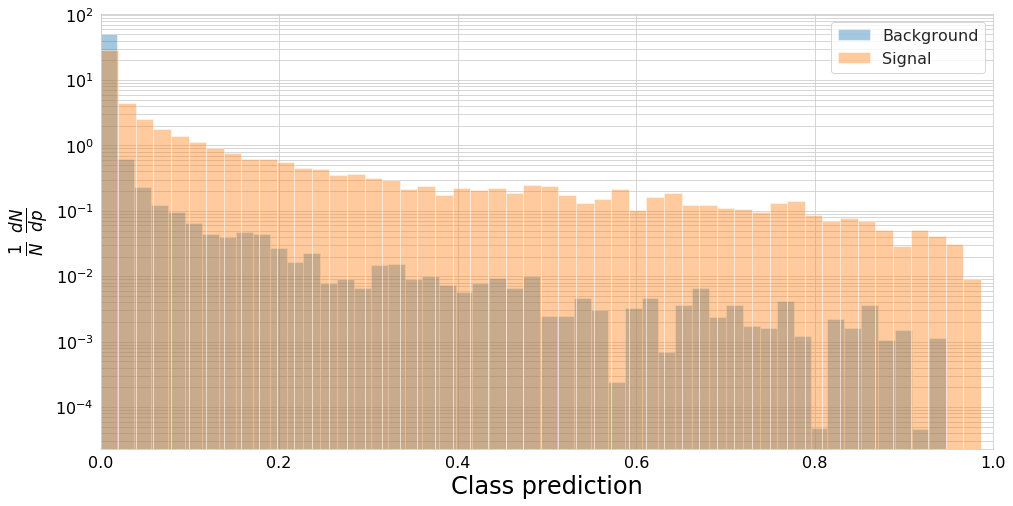

In [17]:
d = convertToDF(valData.source)
bkg_sig_dfs = [
    d[d['gen_target']==0],
    d[d['gen_target']==1],
]
getClassPredPlot(bkg_sig_dfs, weightName='gen_weight')

(50000, 'candidates loaded')
0 ROC AUC: 0.909928834039


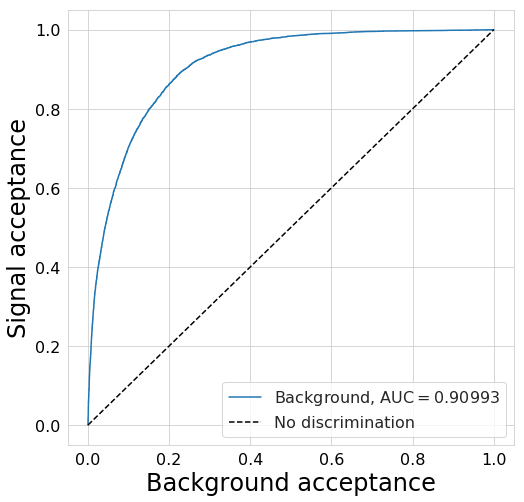

In [18]:
rocPlot([convertToDF(valData.source)], weightName='gen_weight', labels=['Background', 'Signal'])

In [81]:
def plotSignificanceEstimate(inData, sigEstFuncs={}, predName='pred_class', targetName='gen_target', weightName=None, figsize=(8, 8), nBins=100):
    '''Compare significance estimators.
    If an estimator returns two items, the second is interpreted as error.'''
    plt.figure(figsize=figsize)
    h_args = dict(bins=list(1.*i/nBins for i in xrange(nBins+1)), cumulative=-1, alpha=0.5)
    
    df_bkg = inData[inData[targetName]==0]
    h_bkg = plt.hist(
        df_bkg[predName],
        weights=df_bkg[weightName] if weightName else None,
        label='background',
        **h_args
    )

    df_sig = inData[inData[targetName]==1]
    h_sig = plt.hist(
        df_sig[predName],
        weights=df_sig[weightName] if weightName else None,
        label='signal',
        **h_args
    )
    
    plt.yscale('log')
    plt.ylabel('Cumulative event counts / 0.02')
    plt.xlabel('Classifier output')
    plt.legend(loc='best', fontsize=16)
    plt.show()

    s, b = h_sig[0], h_bkg[0]
    bin_centers = (h_sig[1][:-1] + h_sig[1][1:])/2
    plt.figure(figsize=figsize)
    n_bins_filled = min(sum(s>0), sum(b>0))
    s = s[:n_bins_filled]
    b = b[:n_bins_filled]
    bin_centers = bin_centers[:n_bins_filled] 
    #    plt.xlim(0., float(n_bins_filled-1)/(nBins))

    for name, fnc in sigEstFuncs.iteritems():
        est = fnc(s, b)
        est, err = est if len(est) == 2 else (est, None)
        plt.plot(bin_centers, est, label=name)
        if err is not None:
            plt.fill_between(bin_centers,est-err,est+err,linewidth=0,alpha=0.3)

    plt.legend(loc='best', fontsize=16)
    plt.xlabel("Class prediction", fontsize=24, color='black')
    plt.ylabel("Significance estimation", fontsize=24, color='black')
    plt.xticks(fontsize=16, color='black')
    plt.yticks(fontsize=16, color='black')
    plt.show()
    return s, b, bin_centers

(50000, 'candidates loaded')


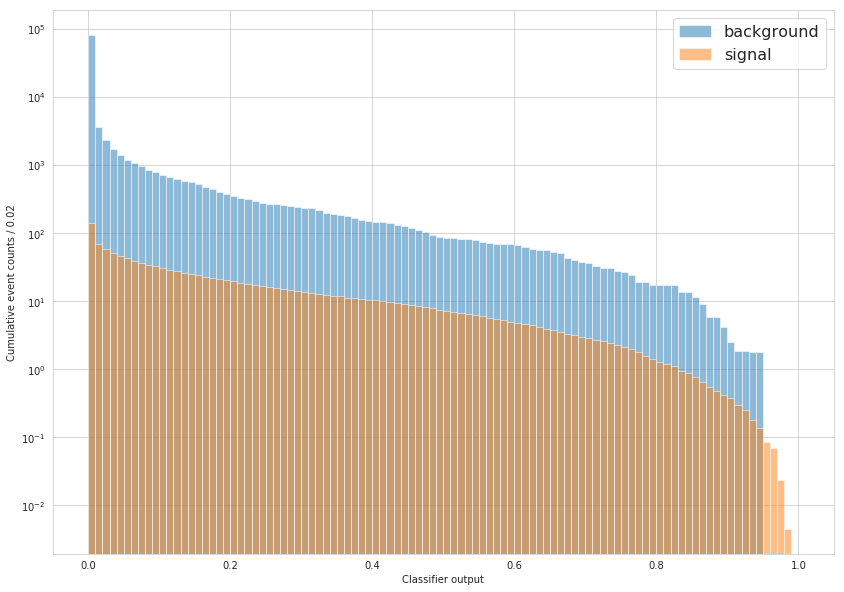

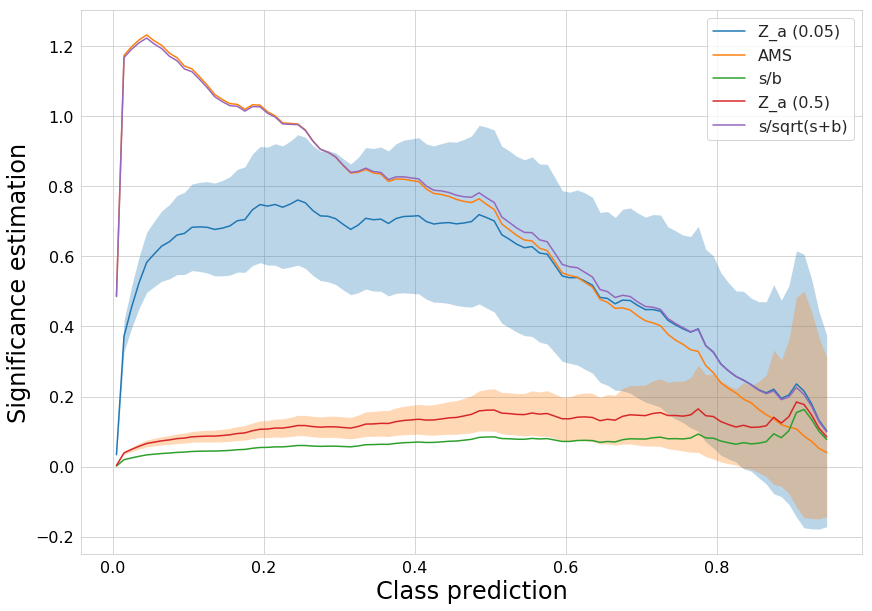

CPU times: user 1.09 s, sys: 9 ms, total: 1.1 s
Wall time: 1.1 s


In [82]:
%%time 

from numpy import sqrt, log, power

def get_asimov(systematic):
    return lambda s,b: (Z_asimov(s,b, systematic), eZ_asimov(s,sqrt(s),b,sqrt(b),systematic))

h1 = plotSignificanceEstimate(
    convertToDF(valData.source), 
    {
        's/b': lambda s,b: s/b,
        's/sqrt(s+b)': lambda s,b: s/np.sqrt(s+b),
        'Z_a (0.5)': get_asimov(0.5),
        'Z_a (0.05)': get_asimov(0.05),
        'AMS': AMS,
#        'asimov err': lambda s,b: eZ(s,sqrt(s),b,sqrt(b)),
    },
    weightName='gen_weight',
    figsize=(14, 10)
)